### Import Library

In [209]:
import tensorflow as tf
import numpy as np

### Membuat Data Generator

In [210]:
img_path = './dataset_padang_food/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    validation_split = 0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    validation_split = 0.2
)

### Batch Picture Augmentation

In [211]:
train_generator = train_datagen.flow_from_directory(
    img_path,
    target_size=(160,160),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    img_path,
    target_size=(160,160),
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)

Found 799 images belonging to 9 classes.
Found 194 images belonging to 9 classes.


### Membuat Model

In [212]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(160,160,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, (3, 3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9,activation='softmax')
])

### Bentuk dari Model

In [213]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 158, 158, 256)     7168      
                                                                 
 max_pooling2d_129 (MaxPool  (None, 79, 79, 256)       0         
 ing2D)                                                          
                                                                 
 conv2d_130 (Conv2D)         (None, 77, 77, 128)       295040    
                                                                 
 max_pooling2d_130 (MaxPool  (None, 38, 38, 128)       0         
 ing2D)                                                          
                                                                 
 conv2d_131 (Conv2D)         (None, 36, 36, 64)        73792     
                                                                 
 max_pooling2d_131 (MaxPool  (None, 18, 18, 64)      

### Compile Model

In [214]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

### Training Model

In [215]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=1000,
    verbose=1,
    callbacks=[earlystop]
)

Epoch 1/1000
50/50 [==============================] - 6s 84ms/step - loss: 2.2059 - accuracy: 0.1640 - val_loss: 2.3731 - val_accuracy: 0.1134
Epoch 2/1000
50/50 [==============================] - 4s 77ms/step - loss: 1.8751 - accuracy: 0.2929 - val_loss: 1.8523 - val_accuracy: 0.2887
Epoch 3/1000
50/50 [==============================] - 4s 76ms/step - loss: 1.5781 - accuracy: 0.3842 - val_loss: 1.7467 - val_accuracy: 0.3763
Epoch 4/1000
50/50 [==============================] - 4s 77ms/step - loss: 1.4785 - accuracy: 0.4318 - val_loss: 1.9956 - val_accuracy: 0.3402
Epoch 5/1000
50/50 [==============================] - 4s 76ms/step - loss: 1.4136 - accuracy: 0.4718 - val_loss: 1.6829 - val_accuracy: 0.4330
Epoch 6/1000
50/50 [==============================] - 4s 77ms/step - loss: 1.3226 - accuracy: 0.5069 - val_loss: 1.8117 - val_accuracy: 0.4433
Epoch 7/1000
50/50 [==============================] - 4s 77ms/step - loss: 1.2882 - accuracy: 0.5244 - val_loss: 1.8258 - val_accuracy: 0.3608

In [216]:
model.evaluate(validation_generator)

13/13 [==============================] - 1s 47ms/step - loss: 1.4457 - accuracy: 0.6546


[1.4457285404205322, 0.6546391844749451]

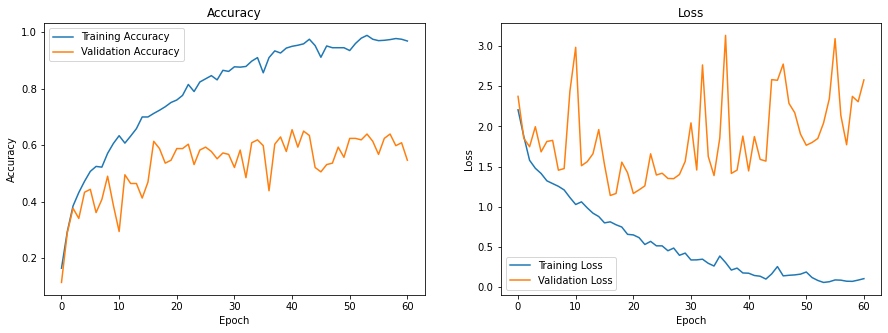

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### VGG16

In [218]:
# using vgg16
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(160,160,3)
)

for layer in vgg16.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(9,activation='softmax')
])

58889256/58889256 [==============================] - 118s 2us/step


In [219]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_26 (Flatten)        (None, 12800)             0         
                                                                 
 dense_78 (Dense)            (None, 32)                409632    
                                                                 
 dense_79 (Dense)            (None, 64)                2112      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_80 (Dense)            (None, 9)                 585       
                                                                 
Total params: 15127017 (57.70 MB)
Trainable params: 4

In [220]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [221]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=1000,
    verbose=1,
    callbacks=[earlystop]
)

Epoch 1/1000
50/50 [==============================] - 6s 87ms/step - loss: 2.0569 - accuracy: 0.2103 - val_loss: 1.7154 - val_accuracy: 0.4072
Epoch 2/1000
50/50 [==============================] - 3s 67ms/step - loss: 1.5371 - accuracy: 0.4293 - val_loss: 1.4506 - val_accuracy: 0.4794
Epoch 3/1000
50/50 [==============================] - 3s 67ms/step - loss: 1.1603 - accuracy: 0.5707 - val_loss: 1.1788 - val_accuracy: 0.5979
Epoch 4/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.7654 - accuracy: 0.7397 - val_loss: 1.0439 - val_accuracy: 0.6495
Epoch 5/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.5439 - accuracy: 0.8098 - val_loss: 1.0102 - val_accuracy: 0.6546
Epoch 6/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3552 - accuracy: 0.8874 - val_loss: 1.0675 - val_accuracy: 0.6443
Epoch 7/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2226 - accuracy: 0.9424 - val_loss: 1.0784 - val_accuracy: 0.6649

In [222]:
model.evaluate(validation_generator)

13/13 [==============================] - 1s 50ms/step - loss: 1.2822 - accuracy: 0.7268


[1.2822484970092773, 0.7268041372299194]

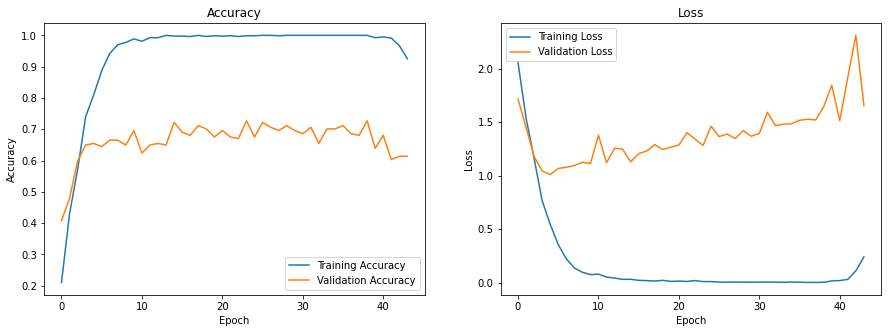

In [223]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Dataset: [Naspad](https://www.kaggle.com/datasets/faldoae/padangfood/data)